# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [2]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [3]:
#Read in data from source 
df_raw = pd.read_csv("admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [4]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
admit       400 non-null int64
gre         398 non-null float64
gpa         398 non-null float64
prestige    399 non-null float64
dtypes: float64(3), int64(1)
memory usage: 12.6 KB


Answer: 400

#### Question 2. Create a summary table

In [ ]:
#function

In [6]:
df_raw.describe()

/Users/charlie_s/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: Because there is a much larger difference between the GRE min/max scale.  The observations span from 220 to 800 vs. 2.26 to 4.0.

#### Question 4. Drop data points with missing data


In [7]:
df_raw2 = df_raw.dropna(how='all')
print df_raw2

     admit    gre   gpa  prestige
0        0  380.0  3.61       3.0
1        1  660.0  3.67       3.0
2        1  800.0  4.00       1.0
3        1  640.0  3.19       4.0
4        0  520.0  2.93       4.0
5        1  760.0  3.00       2.0
6        1  560.0  2.98       1.0
7        0  400.0  3.08       2.0
8        1  540.0  3.39       3.0
9        0  700.0  3.92       2.0
10       0  800.0  4.00       4.0
11       0  440.0  3.22       1.0
12       1  760.0  4.00       1.0
13       0  700.0  3.08       2.0
14       1  700.0  4.00       1.0
15       0  480.0  3.44       3.0
16       0  780.0  3.87       4.0
17       0  360.0  2.56       3.0
18       0  800.0  3.75       2.0
19       1  540.0  3.81       1.0
20       0  500.0  3.17       3.0
21       1  660.0  3.63       2.0
22       0  600.0  2.82       4.0
23       0  680.0  3.19       4.0
24       1  760.0  3.35       2.0
25       1  800.0  3.66       1.0
26       1  620.0  3.61       1.0
27       1  520.0  3.74       4.0
28       1  78

In [8]:
df_raw2.isnull().sum()

admit       0
gre         2
gpa         2
prestige    1
dtype: int64

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: I thought that I did this right but I'm honestly not sue why null values are showing up in the cell above. Help!

>**Comments:** you were close!  But what does the *how='all'* argument do?  It drops rows where EVERY value is missing.  We just want to drop if ANY is missing.  So it should be *how='any'* (which is the default)

#### Question 6. Create box plots for GRE and GPA

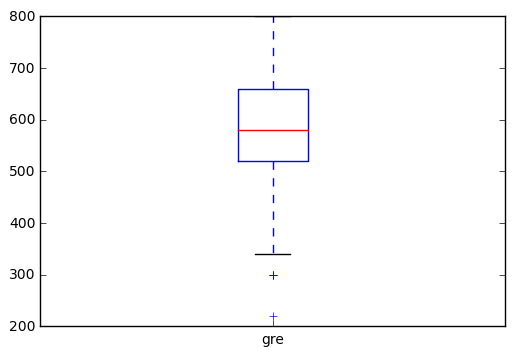

In [9]:
#boxplot 1
df_raw2[["gre"]].plot(kind='box');

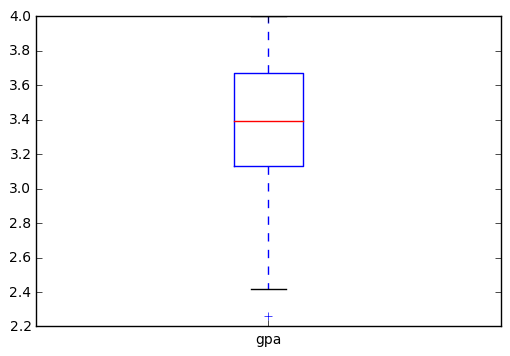

In [10]:
#boxplot 2 
df_raw2[["gpa"]].plot(kind='box');

#### Question 7. What do this plots show?

Answer: These plots show the median (red line), the median of the quartiles (top and bottom of box), the overall range of the data and outliers.

#### Question 8. Describe each distribution 

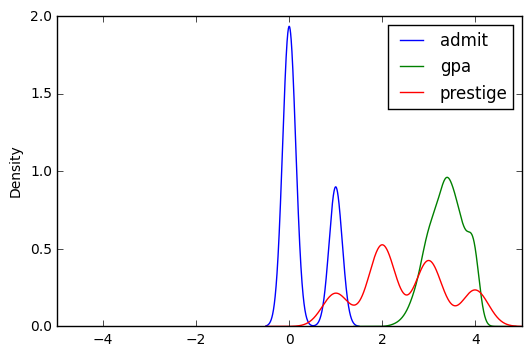

In [11]:
# plot the distribution of each variable 
df_raw2[["admit","gpa","prestige"]].plot(kind="density", xlim=(-5,5));

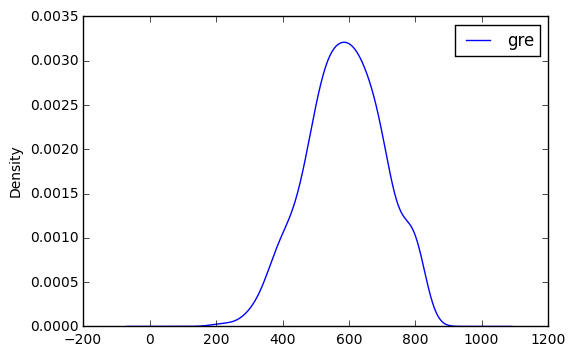

In [12]:
df_raw2[["gre"]].plot(kind="density");

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119fd8f10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11a007c10>]], dtype=object)

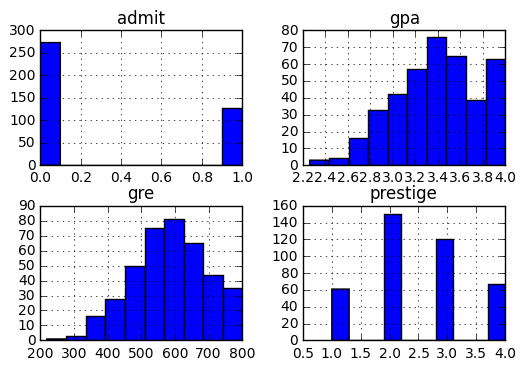

In [13]:
df_raw2.hist()

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: No. None of these distributions are a normal distribution BUT gpa and gre are the closest.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: Yes but I'm not really sure why or how.

>**Comments:** we wouldn't need to correct admit since that's a binary variable (we shouldn't ever assume it's normally distributed!).  But we would need to use a model that takes into account that it's binary (stay tuned -- we'll cover this in class).  For prestige, based on what we did in class last week, how might you treat it?  Clue: should it be treated as categories?  And for GRE and GPA, we might do something like a log-transformation to try to make the "more normal."  In this case, they are not bad, so maybe we could just leave them

#### Question 11. Which of our variables are potentially colinear? 

In [24]:
# create a correlation matrix for the data
df_raw2.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.182919,0.175952,-0.241355
gre,0.182919,1.000000,0.382408,-0.124533
gpa,0.175952,0.382408,1.000000,-0.059031
prestige,-0.241355,-0.124533,-0.059031,1.000000


#### Question 12. What did you find?

Answer: None of these variables seem to be highly correlated although gre & gpa have the strongest correlation. I wouldn't expect either to be colinear.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

In [33]:
import statsmodels.formula.api as smf

lm = smf.ols(formula='admit ~ prestige', data=df_raw2).fit()

lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  admit   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     24.56
Date:                Sat, 08 Oct 2016   Prob (F-statistic):           1.07e-06
Time:                        11:26:55   Log-Likelihood:                -248.52
No. Observations:                 399   AIC:                             501.0
Df Residuals:                     397   BIC:                             509.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.6112      0.064      9.585      0.000         0.486     0.737
prestige      -0.1188      0.024     -4.955      0.000        -0.166    -0.072
==============================================================================
Omnibus:                      277.527   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.297
Skew:                           0.726   Prob(JB):                     1.33e-13
Kurtosis:                       1.793   Cond. No.                         8.43
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Answer: As we did in a previous question I would look to see if there was any strong correlation between prestige and admit (admission). To further explore this I have run a linear regression model using stats models to take a deeper look at the relationship.

#### Question 14. What is your hypothesis? 

Answer: If anything prestige has a negative relationship on admission (admit). Not only is it negatively correlated the coefficient is also negative which leads me to believe that prestige has no real effect on admission rates.

>**Comments:** nice use of regression!  Given how prestige is scored (clue: look at what rank 1 vs rank 4 means), do you still think this is unexpected?

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data

## Feedback


| Requirements | Incomplete (0) | Does Not Meet Expectations (1) | Meets Expectations (2) | Exceeds Expectations (3) |
|---|---|---|---|---|
| Read in your dataset, determine how many samples are present, and ID any missing data | | |X | |
| Create a table of descriptive statistics for each of the variables (n, mean, median, standard deviation) | | |X | |
| Describe the distributions of your data | | | X| |
| Plot box plots for each variable | | | X| |
| Create a covariance matrix | | |X | |
| Determine any issues or limitations, based on your exploratory analysis | | | X| |
| Outline exploratory analysis methods | | | X| |